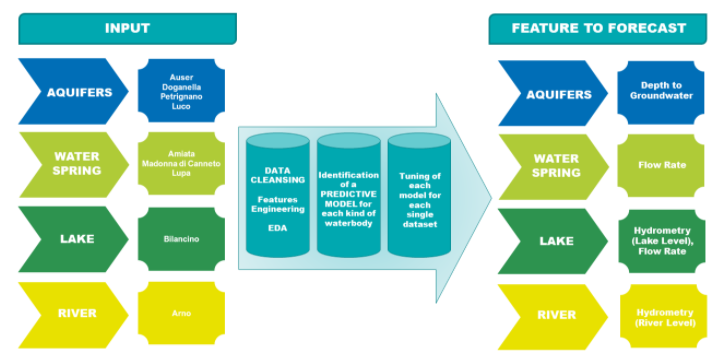

# Acea water predictions for different water bodies- EDA, prediction,Plotly and Time series

The above model describes, what we need to do here in brief. we have four different type of waterbodies: water springs, lakes, rivers and aquifers.
we have dataset for 9 water bodies, 4 aquifer,3 water spring, 1 river and 1 lake. 

1. Aquifer - Auser,Doganella, Luco, Petrignano 
2. Lake - Bilancino 
3. River - Arno
4. water spring - Amiata, Lupa, Madonna 

As each waterbody is different from the other, the related features are also different. A water spring features are different from those of a lake.
we need to build 4 models for 4 different kind of water bodies(water springs, lakes, rivers and aquifers), but we have to predict for each of the 9 water body separately as they are independent of each other. 

Let's look at the above model in details. It describes all the deatils need to be put in notebook. 

1. Data cleaning, feature engineering, EDA
2. Identification of a predictive model for each kind of water body 
3. Tuning of each model for each single dataset
4. For Aquifers we need to forecast **"depth to groundwater"**
5. For water spring we need to forecast **"Flow rate"**
6. For Lake we need to forecast **"Hydrometri(Lake level), Flow rate"**
7. For River we need to forecast **"Hydrometri(River level)"**

The challenge is to determine how features influence the water availability of each presented waterbody. 

**plz upvote if you find my explanation useful. let me know in comments if anything is missing**

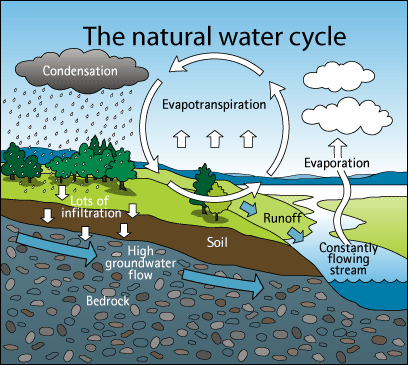

**Let's understand the impact of rainfall and temeprature on these water bodies in general**

The Earth’s water cycle is highly dependent on temperature,So we can conclude this:

**Increased temperature -> Heavy Rainfall -> More water volume -> Higher lake level-> higher stream flow rate- Heavy river flow rate**

Rainy season we see more water and on winter ice. We will see what correlation says between temperature and rainfall, water depth.

In [ ]:
import numpy as np
import pandas as pd

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode,iplot,plot

import os 
# ignoring warnings
import warnings
warnings.simplefilter("ignore")

In [ ]:
from plotly.subplots import make_subplots

**Lets check for the datasets we have here**

In [ ]:
pip install pandas_ods_reader #to read ods files 

In [ ]:
print('Datasets:')
os.listdir('../input/acea-water-prediction')

imported 9 datasets and one data description in ods files. Lets have a look at data description file 

In [ ]:
from pandas_ods_reader import read_ods
featuresDesc= read_ods('../input/acea-water-prediction/datasets_description.ods',1)
pd.set_option("display.max_colwidth", -1)
print(featuresDesc)

**This has all dataset names, some information about them and what output variable expected. Sadly what we dont have here is the details of measurement metrics of rainfall, flow rate, temperature etc. **

# let's explore the 4 different Aquifers 

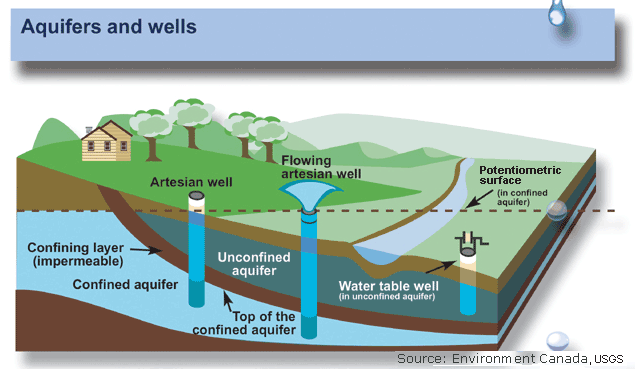

**Terms associated with Aquifers**
*  **Depth to ground water** : The perpendicular distance between the upper edge of the surface and the upper edge of the groundwater surface is considered as depth.
*  **volume** : The volume of water comprise the total resource of groundwater residing within a given basin or area. 
* **Hydrometry** : water flow rate -volume of water crossing a section of a stream for one unit of time- is expressed in cubic metres per second (m3/s).

In [ ]:
#reading datsets of aquifers  
Aquifer_Doganella = pd.read_csv('../input/acea-water-prediction/Aquifer_Doganella.csv')
Aquifer_Auser= pd.read_csv('../input/acea-water-prediction/Aquifer_Auser.csv')
Aquifer_Luco= pd.read_csv('../input/acea-water-prediction/Aquifer_Luco.csv')
Aquifer_Petrignano=pd.read_csv('../input/acea-water-prediction/Aquifer_Petrignano.csv')

# Aquifer Luco

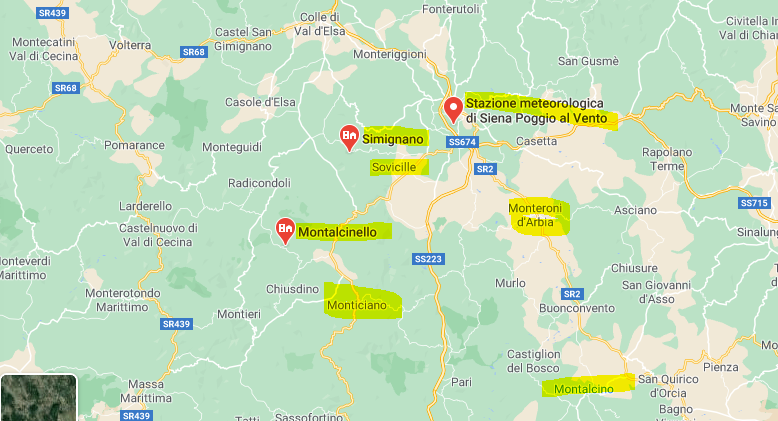

In [ ]:
Aquifer_Luco.info()

In [ ]:
Aquifer_Luco["Date"] = pd.to_datetime(Aquifer_Luco["Date"], format='%d/%m/%Y')

Simignano, Siena_Poggio_al_Vento, Mensano,Montalcinello, Monticiano_la_Pineta,Sovicille, Ponte_Orgia,Scorgiano, Pentolina,Monteroni_Arbia_Biena - these are 10 locations where rainfall is measured and this rainfall water is stored in Luco auifer. These are surrounded location of this Luco aquifer. 

Siena_Poggio_al_Vento,Mensano,Pentolina, Monteroni_Arbia_Biena - these locations 5 where temperature is  measured. As temperature impacts rainfall which is stored in this aquifers. we can explore them with our available dates to check which month has more water and which month water is running dry. 

**info about Aquifer luco from data description as below**

The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.Pozzo is an italian word, it means "water well"

we need to predict for  **Depth_to_Groundwater_Podere_Casetta**

**Have a look at aquifer Luco and its near by areas where rainfall and temperature is measured**

**A small reference for the plotly codes.**

I have created this global function for ploting Rainfall, temperature , water level etc. This is used for aquifer luco and Auser. Avantage, it gives us choice of our colours and avoid clutter of 10 rainfalls in one graph. I have create 5 to avoid much clutter. 
But its too much lines of code,so I have implemented for loop for traces for last 2 aquifers. 
you can go skip this part and move to aquifer Doganella if you want to less line of code. 
you have to zoom into plotly graphs as most of the data are missing for 2000 to 2015 years and you better analyse 2015 to 2020. 

In [ ]:
#This is a global function call used throught the notebook
def scatter_plot(Date,source,name,color):
    trace = go.Scatter(
        x=Date,
        y=source.values,
        name=name,
        showlegend=True,
        marker=dict(
            color=color),
    )
    return trace

In [ ]:
Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Sovicille
name="Sovicille"
T1=scatter_plot(Date,source,name,"Blue")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Ponte_Orgia
name="Ponte_Orgia"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Scorgiano
name="Scorgiano"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Pentolina
name="Pentolina"
T4=scatter_plot(Date,source,name,"Orange")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Monteroni_Arbia_Biena
name="Monteroni_Arbia_Biena"
T5=scatter_plot(Date,source,name,"Red")

data1=[T1,T2,T3,T4,T5]
layout=go.Layout(dict(title='Rainfall near Sovicille,Pentolina,Monteroni,Scorgiano & Ponte_Orgia', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Rainfall)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots9')

In [ ]:
Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Simignano
name="Simignano"
T1=scatter_plot(Date,source,name,"Blue")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Siena_Poggio_al_Vento
name="Siena_Poggio_al_Vento"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Mensano
name="Mensano"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Montalcinello
name="Montalcinello"
T4=scatter_plot(Date,source,name,"Orange")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Rainfall_Monticiano_la_Pineta
name="Monticiano_la_Pineta"
T5=scatter_plot(Date,source,name,"Red")

data1=[T1,T2,T3,T4,T5]
layout=go.Layout(dict(title='Rainfall near aquifer luco', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Rainfall)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots10')

In [ ]:
Date=Aquifer_Luco.Date
source=Aquifer_Luco.Temperature_Siena_Poggio_al_Vento
name="Siena_Poggio_al_Vento"
T1=scatter_plot(Date,source,name,"blue")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Temperature_Mensano
name="Mensano"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Temperature_Pentolina
name="Pentolina"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Temperature_Monteroni_Arbia_Biena
name="Monteroni_Arbia_Biena"
T4=scatter_plot(Date,source,name,"Orange")

data1=[T1,T2,T3,T4]

layout=go.Layout(dict(title='Temperature near aquifer luco', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Temperature)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots11')

July and August has recorded highest temeperature in 2019.here Siena (blue line) and Mensano (green) has low temperature for long time from 2000. Unlike others, siena temperature rises nov 2017. 

In [ ]:
Date=Aquifer_Luco.Date
source=Aquifer_Luco.Depth_to_Groundwater_Podere_Casetta
name="Podere_Casetta'"
T1=scatter_plot(Date,source,name,"blue")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Depth_to_Groundwater_Pozzo_1
name="Pozzo_1"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Depth_to_Groundwater_Pozzo_3
name="Pozzo_3"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Depth_to_Groundwater_Pozzo_4
name="Pozzo_4"
T4=scatter_plot(Date,source,name,"Orange")

data1=[T1,T2,T3,T4]

layout=go.Layout(dict(title='Water availability in water wells (pozzo)', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Water availability)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots12')

In [ ]:
Date=Aquifer_Luco.Date
source=Aquifer_Luco.Volume_Pozzo_1
name="Pozzo_1"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Volume_Pozzo_3
name="Pozzo_3"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Luco.Date
source=Aquifer_Luco.Volume_Pozzo_4
name="Pozzo_4"
T4=scatter_plot(Date,source,name,"Orange")

data1=[T2,T3,T4]

layout=go.Layout(dict(title='Water volume in Pozzo 1 ,3 & 4', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Water volume)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots13')

**I**

# Aquifer Auser

In [ ]:
Aquifer_Auser.info()

In [ ]:
Aquifer_Auser["Date"] = pd.to_datetime(Aquifer_Auser["Date"], format='%d/%m/%Y') 

Rainfall has been measured for these locations-Gallicano, Pontetetto, Monte_Serra, Orentano, Borgo_a_Mozzano, Piaggione, Calavorno,Croce_Arcana,Tereglio_Coreglia_Antelminelli,Fabbriche_di_Vallico. 

Temperature is measured for these 5 locations - Orentano, Monte_Serra, Ponte_a_Moriano, Lucca_Orto_Botanico.

**info about Aquifer Auser from data description as below**

This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.
The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

Here we need to predict these 3 depth values - **Depth_to_Groundwater_SAL, Depth_to_Groundwater_COS, Depth_to_Groundwater_LT2** 
Two of them belong to north subsystem and one belong to south **LT2**
This one will be quite challenging as we cant here take different rainfall into accounts. 

In [ ]:
Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Gallicano
name="Gallicano"
T1=scatter_plot(Date,source,name,"Blue")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Pontetetto
name="Pontetetto"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Monte_Serra
name="Monte_Serra"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Orentano
name="Orentano"
T4=scatter_plot(Date,source,name,"Orange")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Borgo_a_Mozzano
name="Borgo_a_Mozzano"
T5=scatter_plot(Date,source,name,"Red")

data1=[T1,T2,T3,T4,T5]
layout=go.Layout(dict(title='Rainfall in 5 different places in aquifer Auser', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Rainfall)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots15')

In [ ]:
Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Piaggione
name="Piaggione"
T1=scatter_plot(Date,source,name,"Blue")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Calavorno
name="Calavorno"
T2=scatter_plot(Date,source,name,"Red")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Croce_Arcana
name="Croce_Arcana"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Tereglio_Coreglia_Antelminelli
name="Tereglio_Coreglia_Antelminelli"
T4=scatter_plot(Date,source,name,"Orange")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Rainfall_Fabbriche_di_Vallico
name="Fabbriche_di_Vallico"
T5=scatter_plot(Date,source,name,"Green")

data1=[T1,T2,T3,T4,T5]
layout=go.Layout(dict(title='Rainfall in 5 different places in aquifer Auser', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Rainfall)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots16')

In [ ]:
Date=Aquifer_Auser.Date
source=Aquifer_Auser.Temperature_Orentano
name="Orentano"
T1=scatter_plot(Date,source,name,"blue")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Temperature_Monte_Serra
name="Monte_Serra"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Temperature_Ponte_a_Moriano
name="Ponte_a_Moriano"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Temperature_Lucca_Orto_Botanico
name="Lucca_Orto_Botanico"
T4=scatter_plot(Date,source,name,"Orange")

data1=[T1,T2,T3,T4]
layout=go.Layout(dict(title='Temperature in 4 differnt places near aquifer Auser', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Temperature)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots18')

In [ ]:
Date=Aquifer_Auser.Date
source=Aquifer_Auser.Depth_to_Groundwater_LT2
name="LT2"
T1=scatter_plot(Date,source,name,"blue")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Depth_to_Groundwater_SAL
name="SAL"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Depth_to_Groundwater_PAG
name="PAG"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Depth_to_Groundwater_CoS
name="CoS"
T4=scatter_plot(Date,source,name,"Orange")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Depth_to_Groundwater_DIEC
name="DIEC"
T5=scatter_plot(Date,source,name,"Red")
data1=[T1,T2,T3,T4,T5]
layout=go.Layout(dict(title='Water availability in water wells at Aquifer auser', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Water availability)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots19') 

In [ ]:
Date=Aquifer_Auser.Date
source=Aquifer_Auser.Volume_CSA
name="CSA"
T1=scatter_plot(Date,source,name,"Red")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Volume_POL
name="POL"
T2=scatter_plot(Date,source,name,"Green")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Volume_CC1
name="CC1"
T3=scatter_plot(Date,source,name,"Brown")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Volume_CC2
name="CC2"
T4=scatter_plot(Date,source,name,"Orange")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Volume_CSAL
name="CSAL"
T5=scatter_plot(Date,source,name,"Blue")
data1=[T1,T2,T3,T4,T5]

layout=go.Layout(dict(title='ground water volume in waterwells at Aquifer auser', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Water volume)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots13')

In [ ]:
Date=Aquifer_Auser.Date
source=Aquifer_Auser.Hydrometry_Monte_S_Quirico
name="Monte_S_Quirico"
T1=scatter_plot(Date,source,name,"Red")

Date=Aquifer_Auser.Date
source=Aquifer_Auser.Hydrometry_Piaggione
name="Piaggione"
T2=scatter_plot(Date,source,name,"Green")

data1=[T1,T2]
layout=go.Layout(dict(title='Hydrometry of 2 places near Aquifer Auser', 
                      xaxis=dict(title='Date'),
                      yaxis=dict(title='(Hydrometry)')
                     ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='h2o-plots122')

# Aquifer Doganella

In [ ]:
Aquifer_Doganella.info()

In [ ]:
Aquifer_Doganella["Date"] = pd.to_datetime(Aquifer_Doganella["Date"], format='%d/%m/%Y') 


**info about Aquifer Doganella from data description as below**

The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, ..., Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.

we need to predict all the 9 wells here. **Depth_to_Groundwater_Pozzo_1 to Depth_to_Groundwater_Pozzo_9**



In [ ]:

columns_rain=Aquifer_Doganella.columns[Aquifer_Doganella.columns.str.startswith('Rainfall')]
data = []
for Rain in Aquifer_Doganella[columns_rain]: 
    data.append(go.Scatter(
        x = Aquifer_Doganella['Date'],
        y = Aquifer_Doganella[Rain].values,
        name = Rain
    ))
layout=go.Layout(dict(title = "Rain fall in near by area of Auifer Doganella",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'rainfall'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                )
py.iplot(dict(data=data, layout=layout), filename='basic-line1')

In [ ]:

columns_Temperature=Aquifer_Doganella.columns[Aquifer_Doganella.columns.str.startswith('Temperature')]
data = []
for Temperature in Aquifer_Doganella[columns_Temperature]:   

    data.append(go.Scatter(
        x = Aquifer_Doganella['Date'],
        y = Aquifer_Doganella[Temperature].values,
        name = Temperature
    ))
layout = go.Layout(dict(title = "Temperature in near by area of Auifer Doganella",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Temperaturel'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                  )
py.iplot(dict(data=data, layout=layout), filename='basic-line2')

In [ ]:

columns_Depth_to_Groundwater=Aquifer_Doganella.columns[
    Aquifer_Doganella.columns.str.startswith('Depth_to_Groundwater')]
data = []
for Depth_to_Groundwater in Aquifer_Doganella[columns_Depth_to_Groundwater]:   

    data.append(go.Scatter(
        x = Aquifer_Doganella['Date'],
        y = Aquifer_Doganella[Depth_to_Groundwater].values,
        name = Depth_to_Groundwater
    ))
layout = go.Layout(dict(title = "Depth to Groundwater in wells for Auifer Doganella",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Depth_to_Groundwater'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                  )
py.iplot(dict(data=data, layout=layout), filename='basic-line3')

In [ ]:

columns_Volume=Aquifer_Doganella.columns[
    Aquifer_Doganella.columns.str.startswith('Volume')]
data = []
for Volume in Aquifer_Doganella[columns_Volume]: 
    data.append(go.Scatter(
        x = Aquifer_Doganella['Date'],
        y = Aquifer_Doganella[Volume].values,
        name = Volume
    ))
layout = go.Layout(dict(title = "water Volume in well for Auifer Doganella",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'water Volume'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line4')

# Aquifer Petrignano

In [ ]:
Aquifer_Petrignano.info()

**info about Aquifer Petrignano from data description as below**

The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

we have to predict here **Depth_to_Groundwater_P24 and Depth_to_Groundwater_P25**



In [ ]:
Aquifer_Petrignano["Date"] = pd.to_datetime(Aquifer_Petrignano["Date"], format='%d/%m/%Y') 

In [ ]:
#rainfall using scatter()
Date = Aquifer_Petrignano['Date']
source= Aquifer_Petrignano['Rainfall_Bastia_Umbra']
name = "Rainfall_Bastia_Umbra"
T1=scatter_plot(Date,source,name,"Blue")

layout = go.Layout(dict(title = "Rain fall Bastia_Umbra for Aquifer Petrignano",
                  xaxis = dict(title = ''),
                  yaxis = dict(title = 'rain'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,
                  )
py.iplot(dict(data=[T1], layout=layout), filename='basic-line66')

In [ ]:
#water volume
Date = Aquifer_Petrignano['Date']
source= Aquifer_Petrignano['Volume_C10_Petrignano']
name = "Volume_C10_Petrignano"
T1=scatter_plot(Date,source,name,"Red")

layout = go.Layout(dict(title = "water Volume for Aquifer Petrignano",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'water Volume'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line86')

In [ ]:
#hydrometry
Date = Aquifer_Petrignano['Date']
source= Aquifer_Petrignano['Hydrometry_Fiume_Chiascio_Petrignano']
name = "Fiume_Chiascio_Petrignano"
T1=scatter_plot(Date,source,name,"Green")

layout = go.Layout(dict(title = "Hydrometry for Aquifer Petrignano",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Hydrometry'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line06')

In [ ]:
columns_Depth_to_Groundwater=Aquifer_Petrignano.columns[
    Aquifer_Petrignano.columns.str.startswith('Depth_to_Groundwater')]
data = []
for Depth_to_Groundwater in Aquifer_Petrignano[columns_Depth_to_Groundwater]:   

    data.append(go.Scatter(
        x = Aquifer_Petrignano['Date'],
        y = Aquifer_Petrignano[Depth_to_Groundwater].values,
        name = Depth_to_Groundwater
    ))
layout = go.Layout(dict(title = "Depth to Groundwater for Aquifer Petrignano",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Depth_to_Groundwater'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=400,)
py.iplot(dict(data=data, layout=layout), filename='basic-line3')

In [ ]:

columns_Temperature=Aquifer_Petrignano.columns[Aquifer_Petrignano.columns.str.startswith('Temperature')]
data = []
for Temperature in Aquifer_Petrignano[columns_Temperature]:   

    data.append(go.Scatter(
        x = Aquifer_Petrignano['Date'],
        y = Aquifer_Petrignano[Temperature].values,
        name = Temperature
    ))
layout = go.Layout(dict(title = "Temperature for Aquifer Petrignano",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Temperature'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line2')

# explore 3 Water springs 

In [ ]:
#water springs 
Water_Spring_Amiata= pd.read_csv('../input/acea-water-prediction/Water_Spring_Amiata.csv')
Water_Spring_Madonna= pd.read_csv('../input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv')
Water_Spring_Lupa = pd.read_csv('../input/acea-water-prediction/Water_Spring_Lupa.csv')

**Spring** is the result of an aquifer being filled to the point that the water overflows onto the land surface. They range in size from intermittent seeps, which flow only after much rain, to huge pools flowing hundreds of millions of gallons daily. 
**Here we have flow rate of water spring to measure its water volume presence**

# Water Spring Amiata

In [ ]:
Water_Spring_Amiata.info()

In [ ]:
Water_Spring_Amiata["Date"] = pd.to_datetime(Water_Spring_Amiata["Date"], format='%d/%m/%Y') 

In [ ]:
#plot the rainfalls
columns_rain=Water_Spring_Amiata.columns[Water_Spring_Amiata.columns.str.startswith('Rainfall')]
data = []
for Rain in Water_Spring_Amiata[columns_rain]:
    data.append(go.Scatter(
        x = Water_Spring_Amiata['Date'],
        y = Water_Spring_Amiata[Rain].values,
        name = Rain
    ))
layout = go.Layout(dict(title = "Rain fall for Water Spring Amiata",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'rainfall'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line5')

In [ ]:

columns_Temperature=Water_Spring_Amiata.columns[Water_Spring_Amiata.columns.str.startswith('Temperature')]
data = []
for Temperature in Water_Spring_Amiata[columns_Temperature]:   

    data.append(go.Scatter(
        x = Water_Spring_Amiata['Date'],
        y = Water_Spring_Amiata[Temperature].values,
        name = Temperature
    ))
layout = go.Layout(dict(title = "Temperature for Water Spring Amiata",
                  xaxis = dict(title = ''),
                  yaxis = dict(title = 'Temperature'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line7')

In [ ]:

columns_Depth_to_Groundwater=Water_Spring_Amiata.columns[
    Water_Spring_Amiata.columns.str.startswith('Depth_to_Groundwater')]
data = []
for Depth_to_Groundwater in Water_Spring_Amiata[columns_Depth_to_Groundwater]:   

    data.append(go.Scatter(
        x = Water_Spring_Amiata['Date'],
        y = Water_Spring_Amiata[Depth_to_Groundwater].values,
        name = Depth_to_Groundwater
    ))
layout = go.Layout(dict(title = "Depth to Groundwater for Water Spring Amiata",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Depth_to_Groundwater'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line9')

In [ ]:

columns_Flow_Rate=Water_Spring_Amiata.columns[Water_Spring_Amiata.columns.str.startswith('Flow_Rate')]
data = []
for Flow_Rate in Water_Spring_Amiata[columns_Flow_Rate]:   

    data.append(go.Scatter(
        x = Water_Spring_Amiata['Date'],
        y = Water_Spring_Amiata[Flow_Rate].values,
        name = Flow_Rate
    ))
layout = go.Layout(dict(title = "Flow Rate for Water Spring Amiata",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Flow_Rate'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line8')

In [ ]:
Water_Spring_Madonna.info()

# River Arno

In [ ]:
River_Arno=pd.read_csv('../input/acea-water-prediction/River_Arno.csv')
Lake_Bilancino=pd.read_csv('../input/acea-water-prediction/Lake_Bilancino.csv')

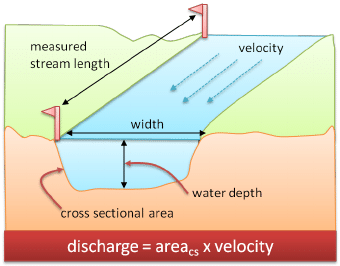

**Terms associated with River**

**Hydrometry** : river Volumetric flow rate, also known as discharge, is the volume of water which passes through a given cross-section of the river channel per unit time.

In [ ]:
River_Arno.info()

In [ ]:
River_Arno["Date"] = pd.to_datetime(River_Arno["Date"], format='%d/%m/%Y') 

In [ ]:
#plot the rainfalls
columns_rain=River_Arno.columns[River_Arno.columns.str.startswith('Rainfall')]
data = []
for Rain in River_Arno[columns_rain]:
    data.append(go.Scatter(
        x = River_Arno['Date'],
        y = River_Arno[Rain].values,
        name = Rain
    ))
layout = go.Layout(dict(title = "Rain fall for River Arno",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'rainfall'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line89')

In [ ]:

#Temperature
Date = River_Arno['Date']
source= River_Arno['Temperature_Firenze']
name = "Temperature_Firenze"
T1=scatter_plot(Date,source,name,"Blue")

layout = go.Layout(dict(title = "Temperature Firenze for River Arno",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Temperature'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line46')

In [ ]:

#Hydrometry
Date = River_Arno['Date']
source= River_Arno['Hydrometry_Nave_di_Rosano']
name = "Hydrometry_Nave_di_Rosano"
T1=scatter_plot(Date,source,name,"Blue")

layout = go.Layout(dict(title = "Hydrometry Nave di Rosano for River Arno",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Hydrometry'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line46')

# Lake Bilancino

**Terms associated to lake**

**Lake level** : Water level in lakes and reservoirs is measured in centimetres against the national reference plane or against some adopted plane (so called “zero” graph). Surface area of a lake or reservoir is measured in m2 or km2 depending on their size.

**Flow rate** : It is the volume of water passing a point in a fixed period of time.
Flow rate is usually measured in cubic feet per second (cfs or ft³/sec) but could also be measured in gallons or liters per minute or second.

In [ ]:
Lake_Bilancino.info()

In [ ]:
Lake_Bilancino["Date"] = pd.to_datetime(Lake_Bilancino["Date"], format='%d/%m/%Y') 

In [ ]:
#plot the rainfalls
columns_rain=Lake_Bilancino.columns[Lake_Bilancino.columns.str.startswith('Rainfall')]
data = []
for Rain in Lake_Bilancino[columns_rain]:
    data.append(go.Scatter(
        x = Lake_Bilancino['Date'],
        y = Lake_Bilancino[Rain].values,
        name = Rain
    ))
layout = go.Layout(dict(title = "Rain fall for Lake Bilancino",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'rainfall'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=data, layout=layout), filename='basic-line99')

In [ ]:
#Temperature_Le_Croci
Date = Lake_Bilancino['Date']
source= Lake_Bilancino['Temperature_Le_Croci']
name = "Temperature_Le_Croci"
T1=scatter_plot(Date,source,name,"Blue")
layout = go.Layout(dict(title = "Temperature Le Croci for Lake Bilancino",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Temperature'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line46')

In [ ]:
#Lake_Level
Date = Lake_Bilancino['Date']
source= Lake_Bilancino['Lake_Level']
name = "Lake_Level"
T1=scatter_plot(Date,source,name,"Green")

layout = go.Layout(dict(title = "Lake Level for Lake Bilancino",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Lake_Level'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line06')

In [ ]:
#Flow_Rate
Date = Lake_Bilancino['Date']
source= Lake_Bilancino['Flow_Rate']
name = "Flow_Rate"
T1=scatter_plot(Date,source,name,"Brown")
layout = go.Layout(dict(title = "Flow Rate for Lake Bilancino",
                  xaxis = dict(title = 'Date'),
                  yaxis = dict(title = 'Flow_Rate'),
                  ),legend=dict(orientation="h"),autosize=False,width=800,height=600,)
py.iplot(dict(data=[T1], layout=layout), filename='basic-line06')